In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ROCAUC,ConfusionMatrix
from scipy.stats import f_oneway
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
df = pd.read_csv('star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# Description of Dataset

In [4]:
df.shape

(100000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [6]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [7]:
num = df.select_dtypes(include=np.number)
num.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate',
       'MJD', 'fiber_ID'],
      dtype='object')

In [8]:
cat = df.select_dtypes(include=object)
cat.columns

Index(['class'], dtype='object')

In [9]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [10]:
df.describe(include=object)

,class
count,100000
unique,3
top,GALAXY
freq,59445


In [11]:
cat.value_counts(normalize=True)

class 
GALAXY    0.59445
STAR      0.21594
QSO       0.18961
dtype: float64

# Missing/Null Values

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missed = pd.concat([total,percent],axis=1,keys=['total','percent'])
missed

,total,percent
obj_ID,0,0.0
alpha,0,0.0
MJD,0,0.0
plate,0,0.0
redshift,0,0.0
class,0,0.0
spec_obj_ID,0,0.0
field_ID,0,0.0
cam_col,0,0.0
rerun_ID,0,0.0


# Checking of Outliers 

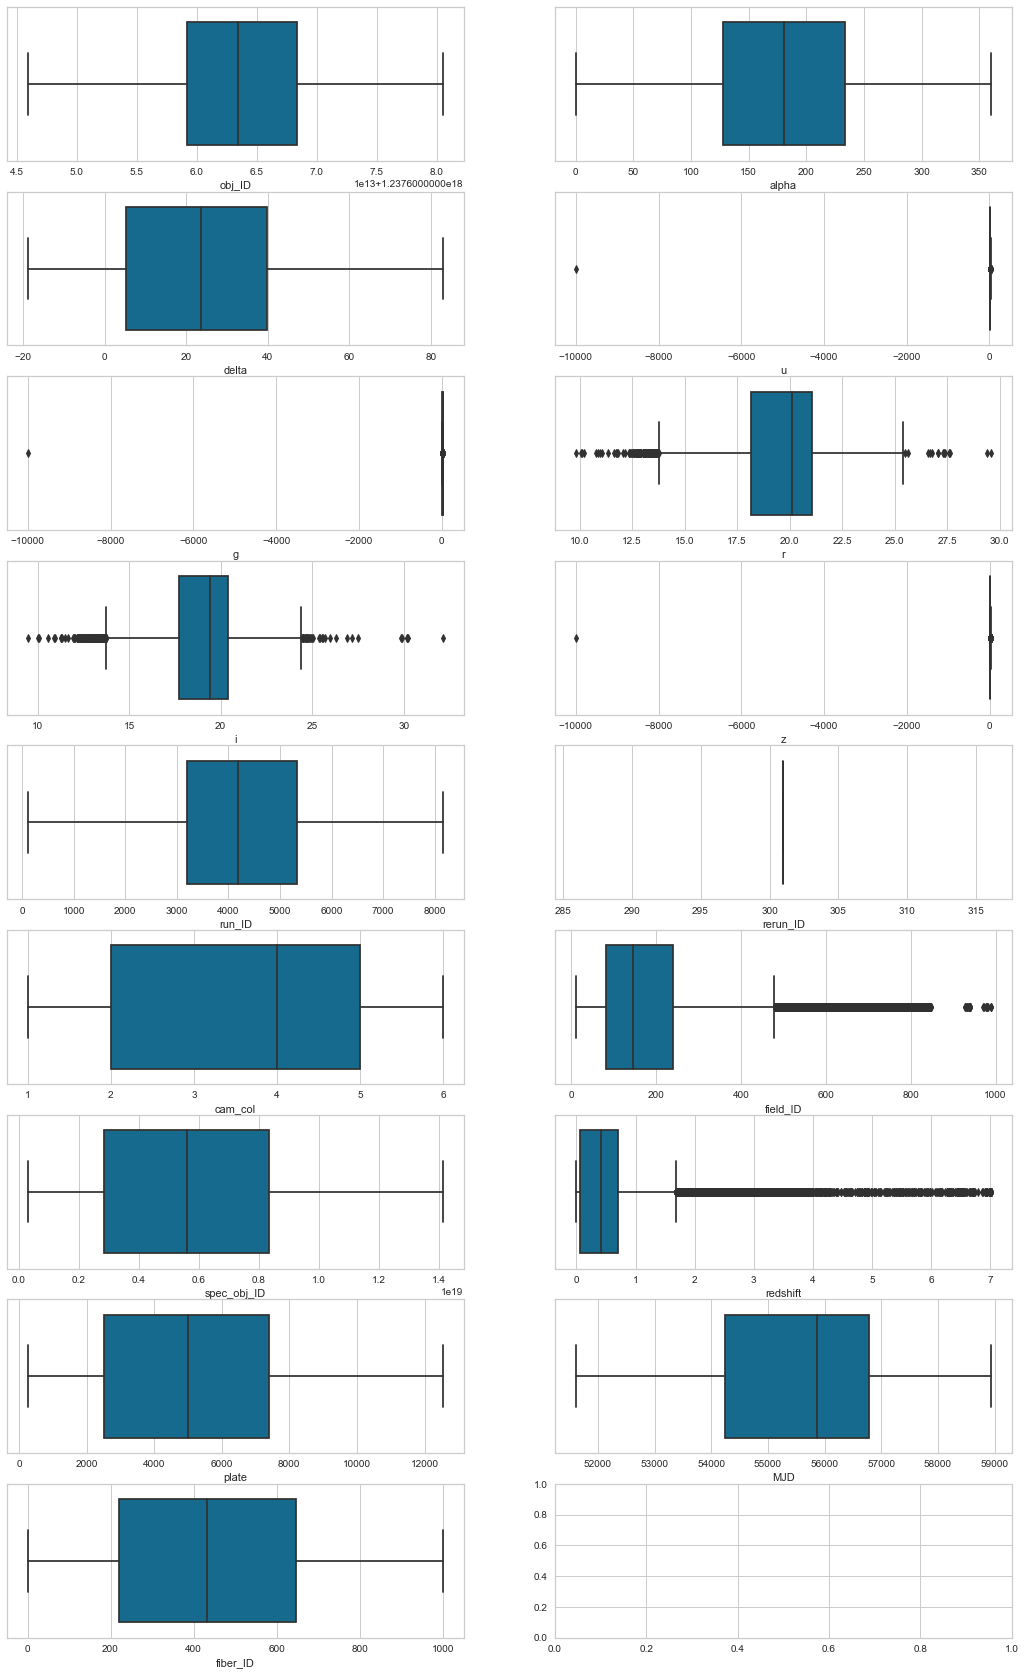

In [13]:
fig,ax = plt.subplots(nrows = 9,ncols = 2,figsize = [18,30])
for i,j in zip(df.select_dtypes(np.number).columns,ax.flatten()):
    sb.boxplot(df[i],ax = j)
plt.show()

# Treatment of Outliers

In [14]:
def outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    low_lim = q1-(1.5*iqr)
    up_lim = q3+(1.5*iqr)
    
    for x in df[col]:
        if x > up_lim :
            df[col] = df[col].replace(to_replace=x,value=up_lim)
        elif x < low_lim:
            df[col] = df[col].replace(to_replace=x,value=low_lim)

In [15]:
for i in ['i','redshift','r','field_ID']:
    outliers(df,i)

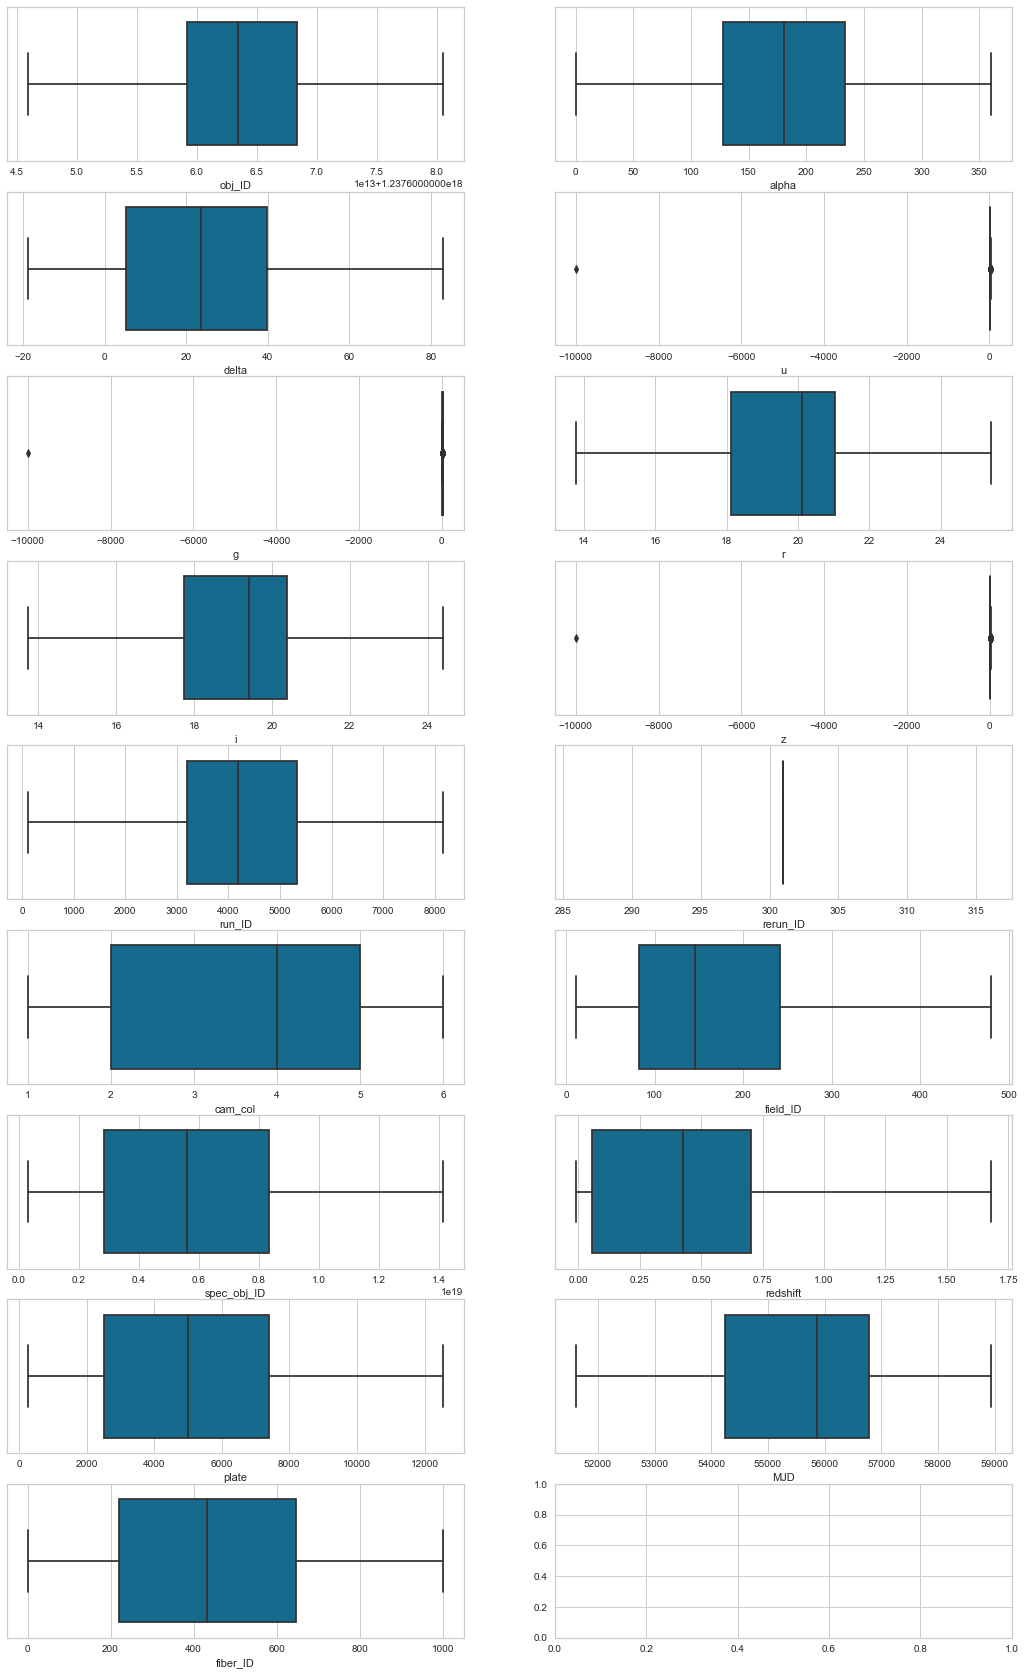

In [16]:
fig , ax = plt.subplots(nrows = 9,ncols = 2,figsize = [18,30])
for i , j in zip(df.select_dtypes(np.number).columns,ax.flatten()):
    sb.boxplot(df[i],ax = j)
plt.show()

# Distribution and Skewness of Data

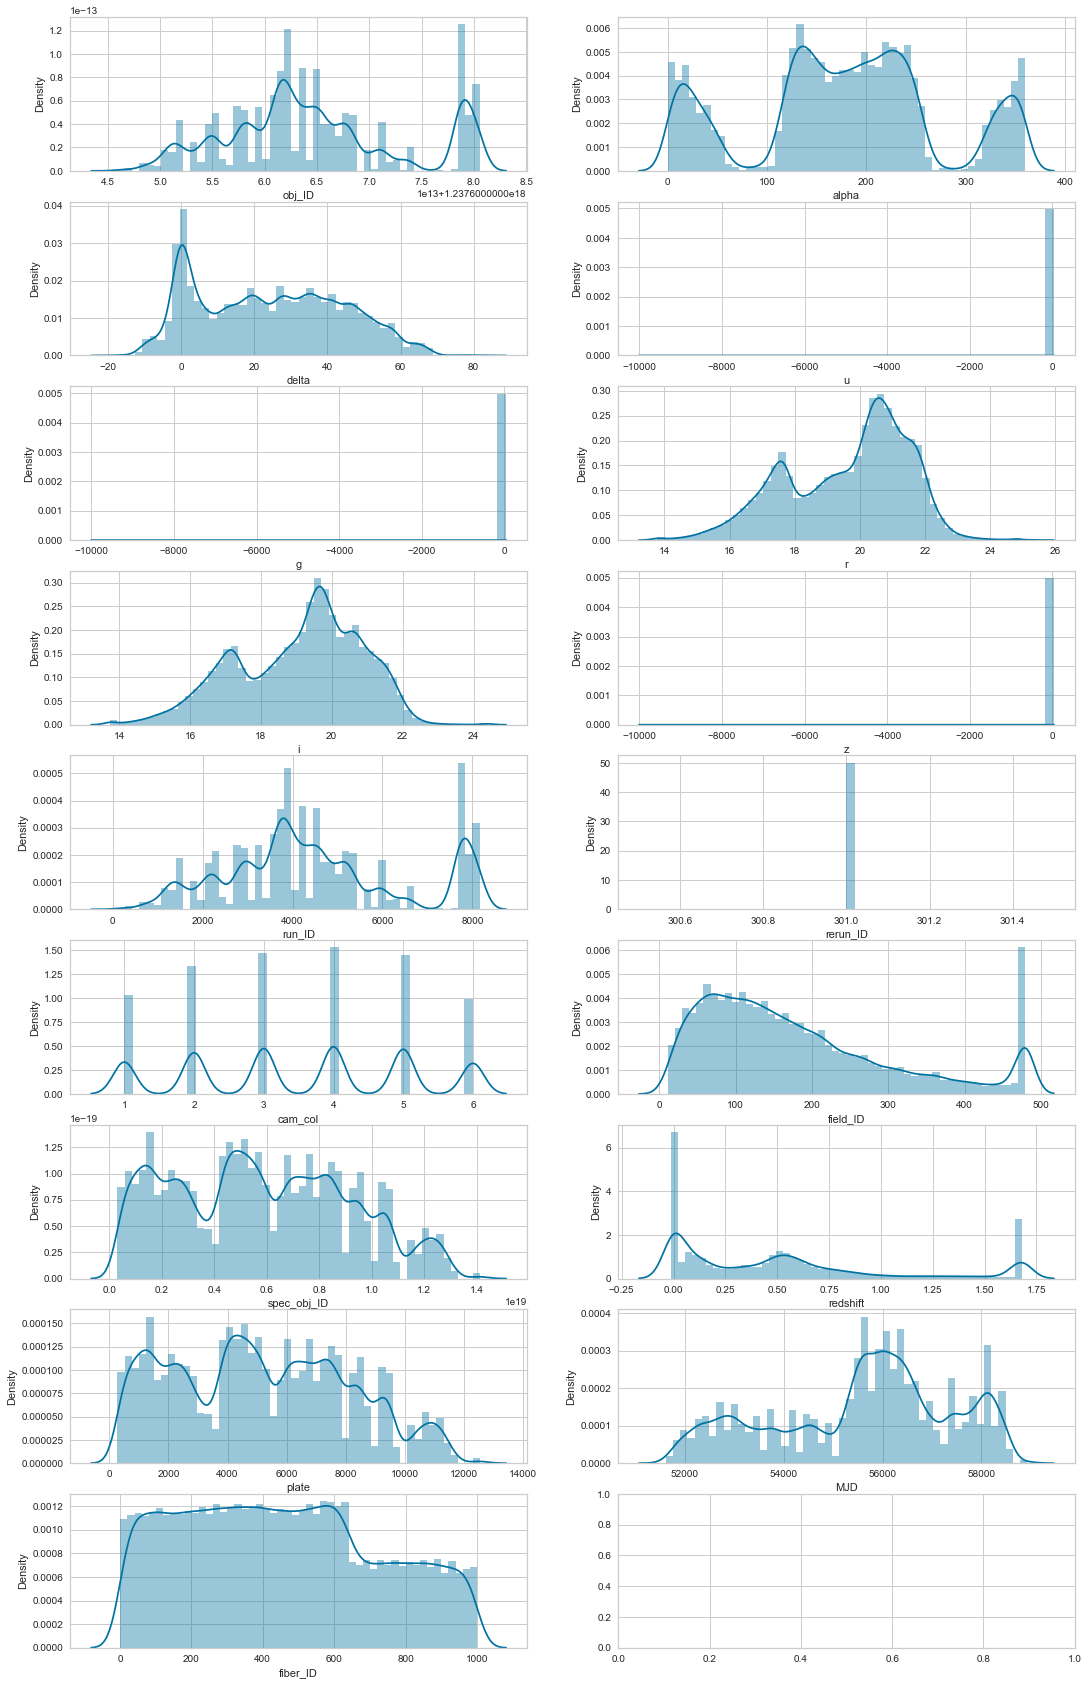

In [17]:
fig,ax = plt.subplots(nrows = 9,ncols = 2,figsize = [18,30])
for i,j in zip(df.select_dtypes(np.number).columns,ax.flatten()):
    sb.distplot(df[i],ax=j)
plt.show()

In [18]:
for i in df.select_dtypes(include=np.number).columns:
    print(i,' : ',df[i].skew())

obj_ID  :  0.39872717908199823
alpha  :  -0.028510865453805028
delta  :  0.1750785620755768
u  :  -313.84924237751426
g  :  -314.2766945750886
r  :  -0.4980064496348354
i  :  -0.4024479161721397
z  :  -314.759418791375
run_ID  :  0.3987105222898206
rerun_ID  :  0
cam_col  :  -0.030531673216738223
field_ID  :  0.9749428039184965
spec_obj_ID  :  0.19846274634146077
redshift  :  1.0539431946069198
plate  :  0.19847180267952066
MJD  :  -0.3818531750786742
fiber_ID  :  0.2297191201328803


# Correlation Matrix

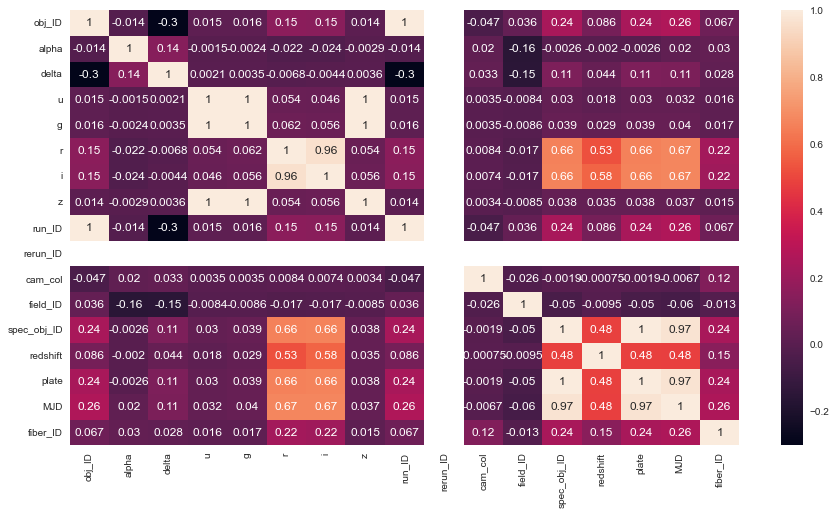

In [19]:
sb.heatmap(df.corr(),annot=True)
plt.show()

# Target Variable Analysis

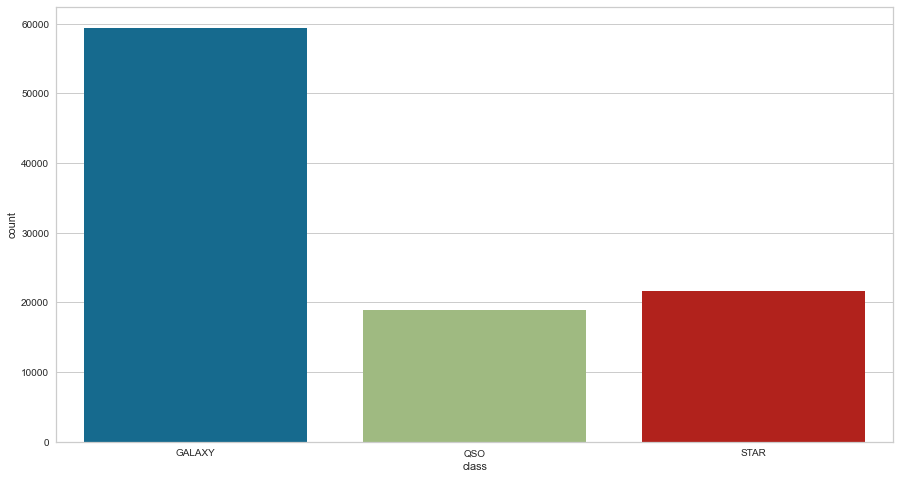

In [20]:
sb.countplot(df['class'])
plt.show()

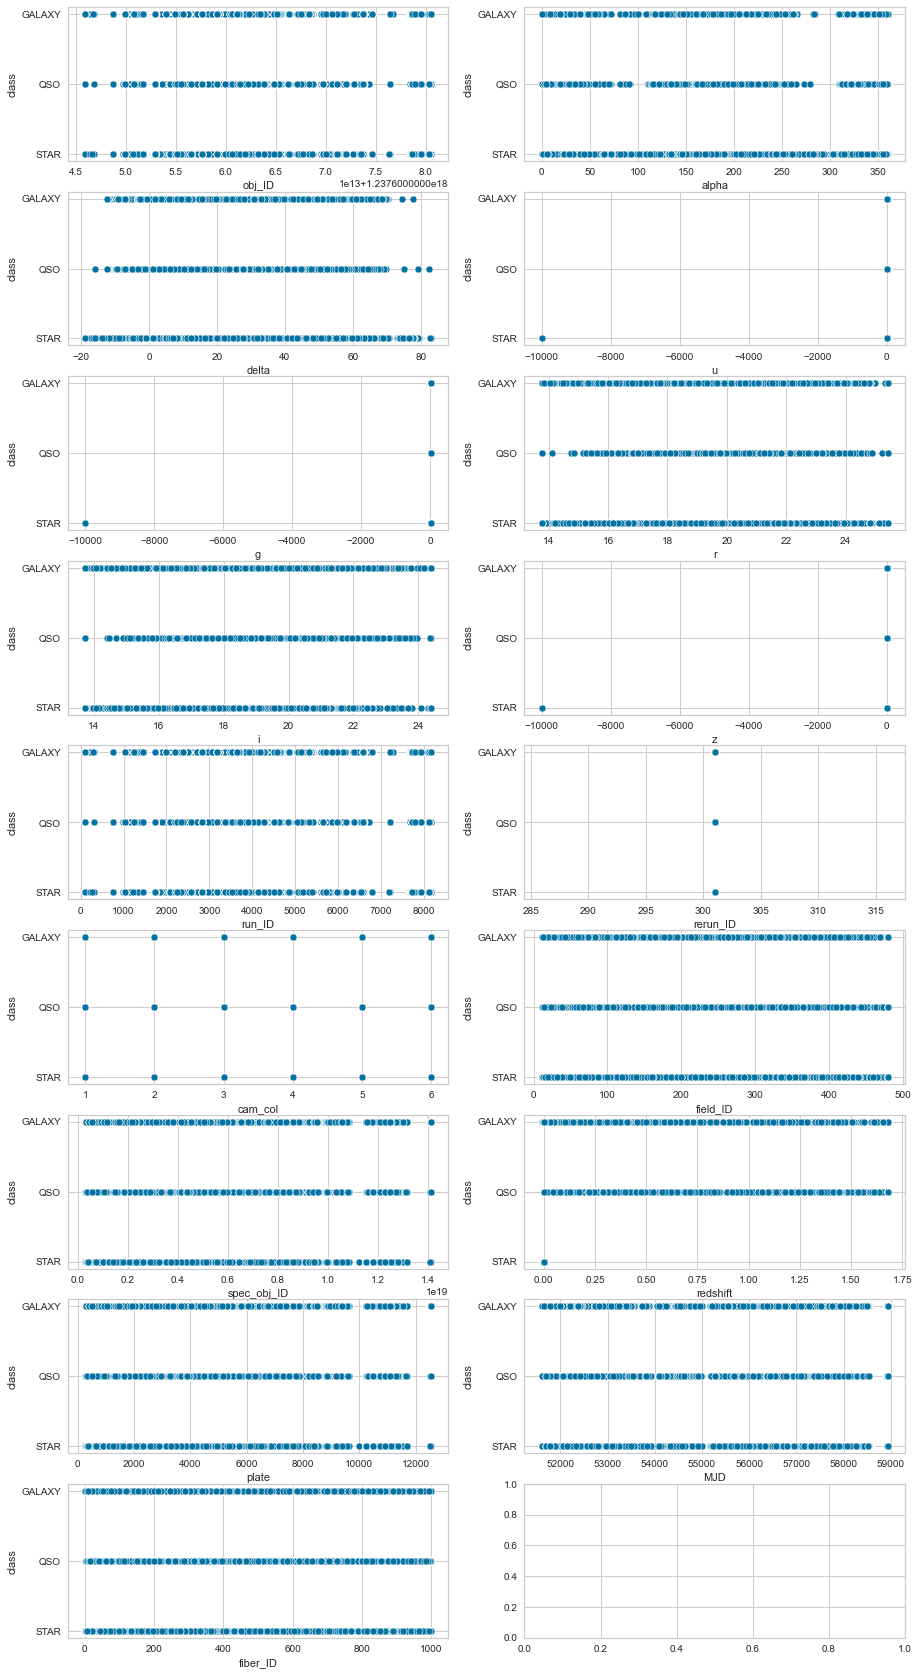

In [21]:
df_num = df.select_dtypes(include=np.number)
fig,ax = plt.subplots(nrows = 9,ncols = 2,figsize = [15,30])
for i,j in zip(df_num.columns,ax.flatten()):
    sb.scatterplot(x = df[i],y = df['class'],ax = j)
plt.show()

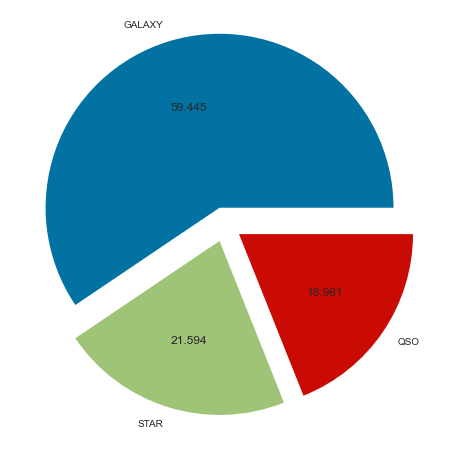

In [22]:
plt.pie(df['class'].value_counts(),autopct='%.3f',labels=df['class'].value_counts().index,explode=[0.1,0.1,0.1])
plt.show()

# Statistical Analysis of Variables

## Anova Analysis for getting significant variables

In [23]:
tcol = []
tpval = []
ts = []
for n in df.select_dtypes(include='number').columns:
    tcol.append(n)
    g1 = df[n][df['class']=='GALAXY']
    g2 = df[n][df['class']=='STAR']
    g3 = df[n][df['class']=='QSO']
    
    s,p = f_oneway(g1,g2)
    tpval.append(round(p,4))
    if (p <= 0.05):
        ts.append('Significant')
    else:
        ts.append('Insignifcant')
print(pd.DataFrame({'Feature':tcol,'P-Value':tpval,'Significance':ts}))

        Feature  P-Value  Significance
0        obj_ID   0.0000   Significant
1         alpha   0.0000   Significant
2         delta   0.9215  Insignifcant
3             u   0.0000   Significant
4             g   0.0000   Significant
5             r   0.0000   Significant
6             i   0.0000   Significant
7             z   0.0387   Significant
8        run_ID   0.0000   Significant
9      rerun_ID      NaN  Insignifcant
10      cam_col   0.0000   Significant
11     field_ID   0.0000   Significant
12  spec_obj_ID   0.0000   Significant
13     redshift   0.0000   Significant
14        plate   0.0000   Significant
15          MJD   0.0000   Significant
16     fiber_ID   0.0000   Significant


# Removal of Insignificant Variables

In [24]:
df_final = df.drop(['delta','rerun_ID'],axis = 1)

# Final Dataset

In [25]:
df_final.head()

,obj_ID,alpha,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79.0,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119.0,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120.0,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214.0,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137.0,6.891865e+18,GALAXY,0.116123,6121,56187,842


# Models

## Splitting of target and independent variables

In [26]:
result=pd.DataFrame(columns=['Model','accuracy_train','accuracy_test'])

In [27]:
x = df_final.drop('class',axis=1)
y = df_final['class']

In [28]:
le = LabelEncoder()
y = pd.DataFrame({'class':le.fit_transform(y)})

In [29]:
y.value_counts()
#0- Galaxy
#2- Star
#1- Quasar

class
0        59445
2        21594
1        18961
dtype: int64

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.05,random_state=10)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((95000, 15), (5000, 15), (95000, 1), (5000, 1))

# SVM

In [32]:
svc = SVC(kernel='rbf',random_state=10)
base_svm = svc.fit(xtrain,ytrain)
ypred = base_svm.predict(xtest)

In [33]:
cm = confusion_matrix(ytest, ypred)
cm

array([[2953,    1,    0],
       [ 991,    3,    0],
       [1052,    0,    0]], dtype=int64)

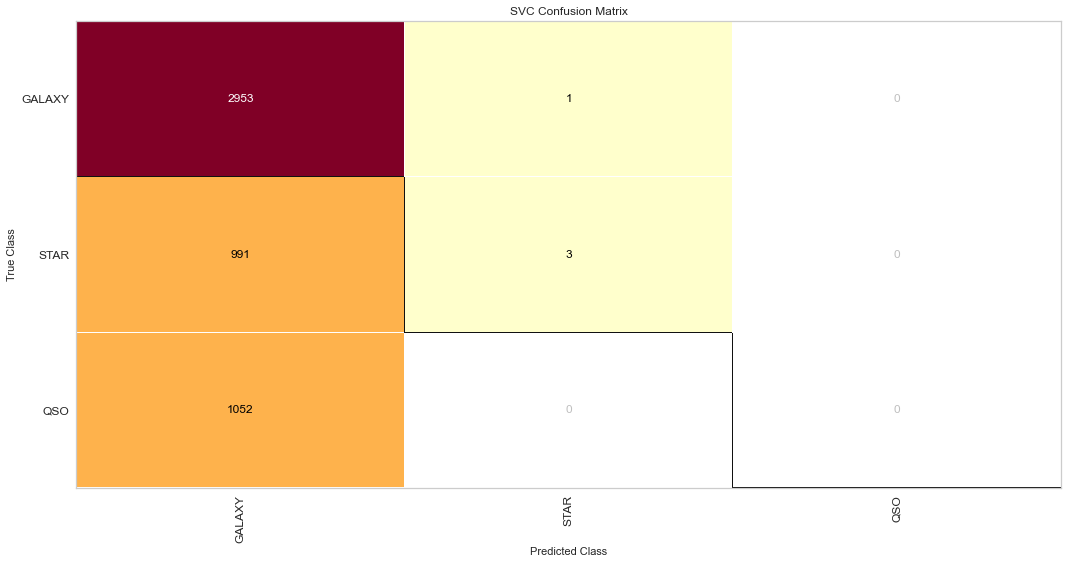

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [34]:
svm_cm = ConfusionMatrix(base_svm, classes=['GALAXY','STAR','QSO'])

svm_cm.fit(xtrain, ytrain)
svm_cm.score(xtest, ytest)
svm_cm.show()

In [35]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74      2954
           1       0.75      0.00      0.01       994
           2       0.00      0.00      0.00      1052

    accuracy                           0.59      5000
   macro avg       0.45      0.33      0.25      5000
weighted avg       0.50      0.59      0.44      5000



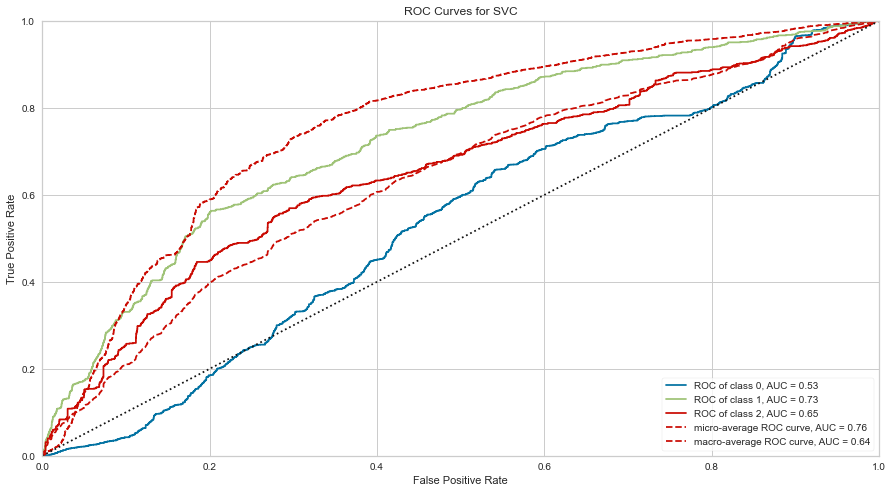

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
visualizer = ROCAUC(base_svm, classes=[0,1,2])
visualizer.fit(xtrain, ytrain)
visualizer.score(xtest, ytest)
visualizer.show()  

In [37]:
base_svm.score(xtest,ytest)

0.5912

In [38]:
base_svm.score(xtrain,ytrain)

0.594421052631579

In [105]:
m=pd.Series({'Model':'Base SVM',
             'accuracy_train':round(base_svm.score(xtrain,ytrain),4),
             'accuracy_test':round(base_svm.score(xtest,ytest),4)
            })
result=result.append(m,ignore_index=True)

# Decision Tree

In [40]:
dc=DecisionTreeClassifier(random_state=10)
base_dc=dc.fit(xtrain,ytrain)
ypred=base_dc.predict(xtest)

In [41]:
cm = confusion_matrix(ytest, ypred)
cm

array([[2863,   85,    6],
       [  96,  898,    0],
       [   9,    0, 1043]], dtype=int64)

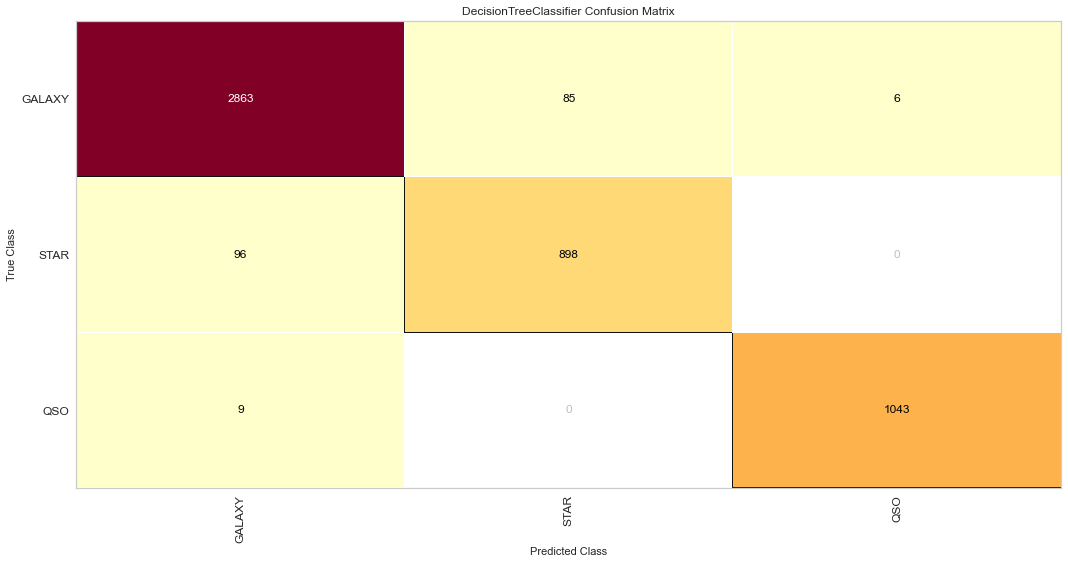

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [42]:
dc_cm = ConfusionMatrix(base_dc, classes=['GALAXY','STAR','QSO'])

dc_cm.fit(xtrain, ytrain)
dc_cm.score(xtest, ytest)
dc_cm.show()

In [43]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2954
           1       0.91      0.90      0.91       994
           2       0.99      0.99      0.99      1052

    accuracy                           0.96      5000
   macro avg       0.96      0.95      0.96      5000
weighted avg       0.96      0.96      0.96      5000



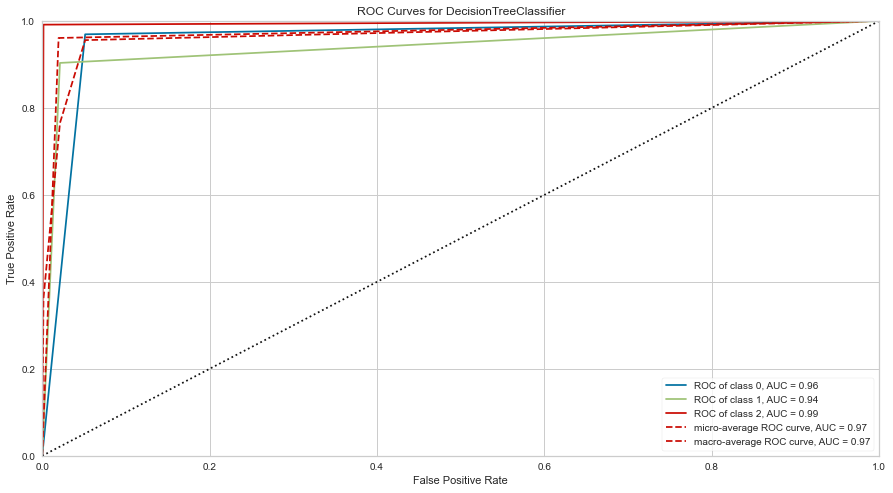

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [44]:
visualizer = ROCAUC(base_dc, classes=[0,1,2])
visualizer.fit(xtrain, ytrain)
visualizer.score(xtest, ytest)
visualizer.show()  

In [45]:
base_dc.score(xtest,ytest)

0.9608

In [46]:
base_dc.score(xtrain,ytrain)

1.0

In [107]:
m=pd.Series({'Model':'Base DecisionTree',
             'accuracy_train':round(base_dc.score(xtrain,ytrain),4),
             'accuracy_test':round(base_dc.score(xtest,ytest),4)
            })
result=result.append(m,ignore_index=True)

# RandomForest

In [48]:
rf=RandomForestClassifier(random_state=10)
base_rf= rf.fit(xtrain,ytrain)
ypred=base_rf.predict(xtest)

In [49]:
cm = confusion_matrix(ytest, ypred)
cm

array([[2908,   30,   16],
       [  71,  923,    0],
       [   0,    0, 1052]], dtype=int64)

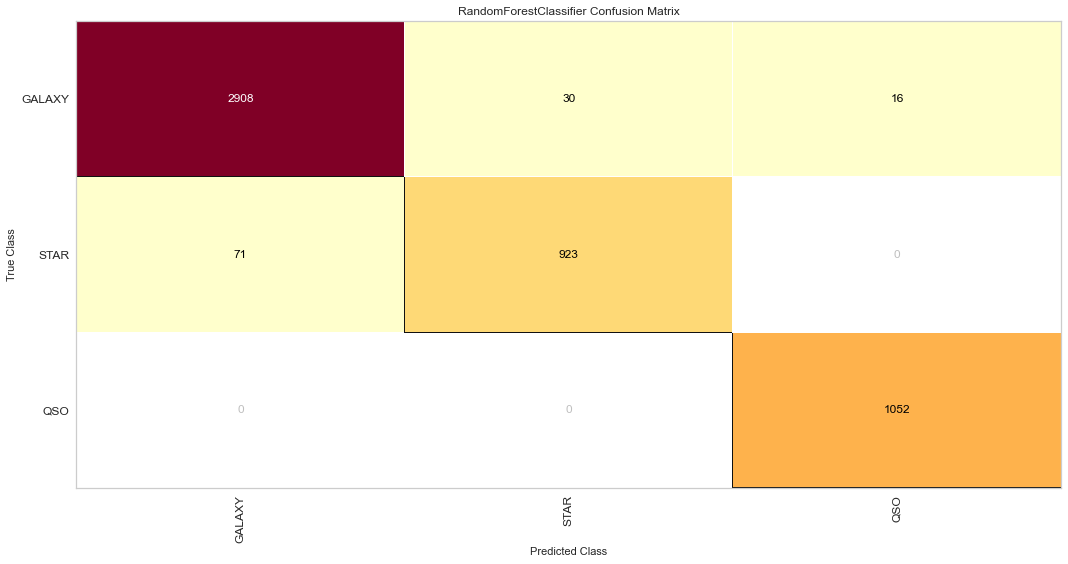

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [50]:
rf_cm = ConfusionMatrix(base_rf, classes=['GALAXY','STAR','QSO'])

rf_cm.fit(xtrain, ytrain)
rf_cm.score(xtest, ytest)
rf_cm.show()

In [51]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2954
           1       0.97      0.93      0.95       994
           2       0.99      1.00      0.99      1052

    accuracy                           0.98      5000
   macro avg       0.98      0.97      0.97      5000
weighted avg       0.98      0.98      0.98      5000



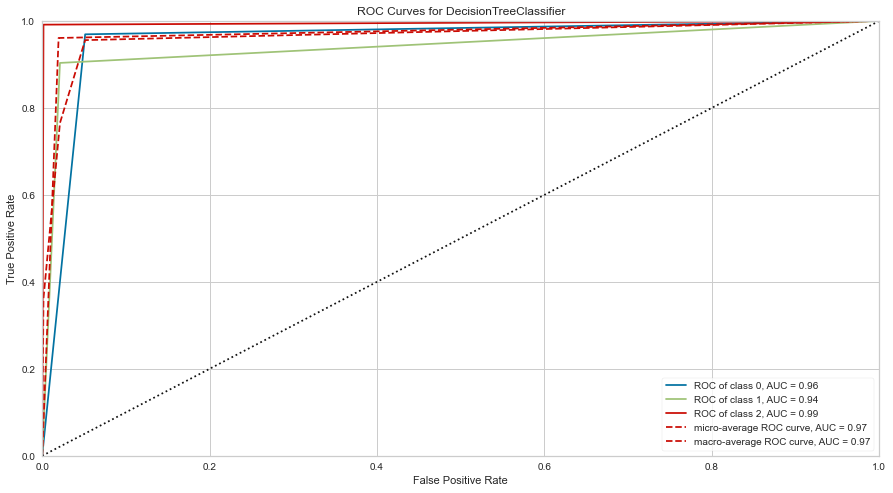

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [52]:
visualizer = ROCAUC(base_dc, classes=[0,1,2])
visualizer.fit(xtrain, ytrain)
visualizer.score(xtest, ytest)
visualizer.show() 

In [53]:
base_rf.score(xtest,ytest)

0.9766

In [54]:
base_rf.score(xtrain,ytrain)

0.9999578947368422

In [108]:
m=pd.Series({'Model':'Base RandomForest',
             'accuracy_train':round(base_rf.score(xtrain,ytrain),4),
             'accuracy_test':round(base_rf.score(xtest,ytest),4)
            })
result=result.append(m,ignore_index=True)

# SMOTE

In [31]:
smote= SMOTE(random_state=10)
x1, y1 = smote.fit_resample(x, y)

In [32]:
y1.value_counts()

class
0        59445
1        59445
2        59445
dtype: int64

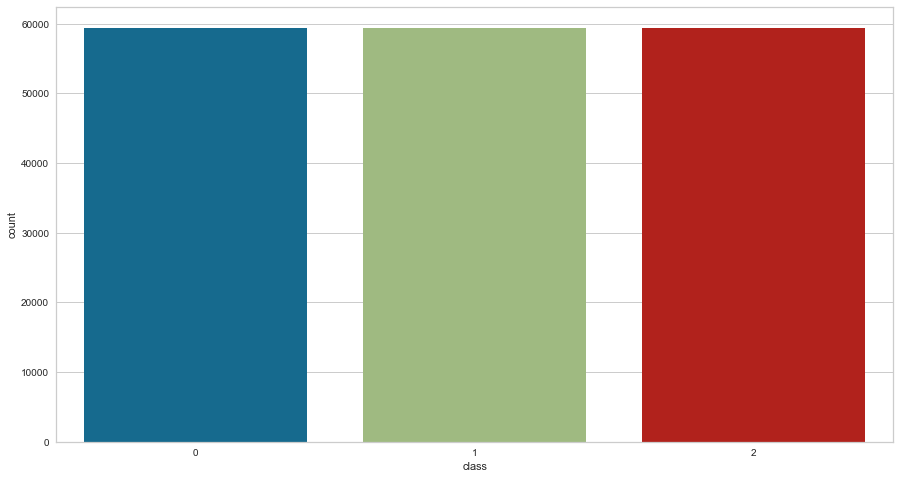

In [33]:
sb.countplot(y1['class'])
plt.show()

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.05,random_state=10)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((169418, 15), (8917, 15), (169418, 1), (8917, 1))

# Decision Tree

In [60]:
dc=DecisionTreeClassifier(random_state=10)
smote_dc=dc.fit(xtrain,ytrain)
ypred=smote_dc.predict(xtest)

In [61]:
cm = confusion_matrix(ytest, ypred)
cm

array([[2794,  141,    5],
       [ 128, 2869,    0],
       [   6,    0, 2974]], dtype=int64)

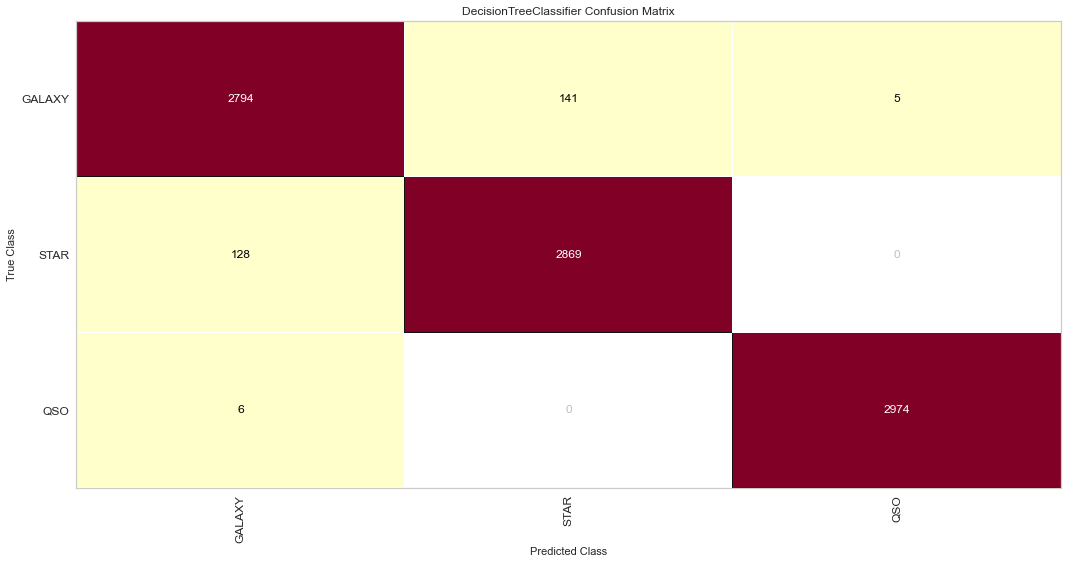

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [62]:
smote_cm = ConfusionMatrix(smote_dc, classes=['GALAXY','STAR','QSO'])

smote_cm.fit(xtrain, ytrain)
smote_cm.score(xtest, ytest)
smote_cm.show()

In [63]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2940
           1       0.95      0.96      0.96      2997
           2       1.00      1.00      1.00      2980

    accuracy                           0.97      8917
   macro avg       0.97      0.97      0.97      8917
weighted avg       0.97      0.97      0.97      8917



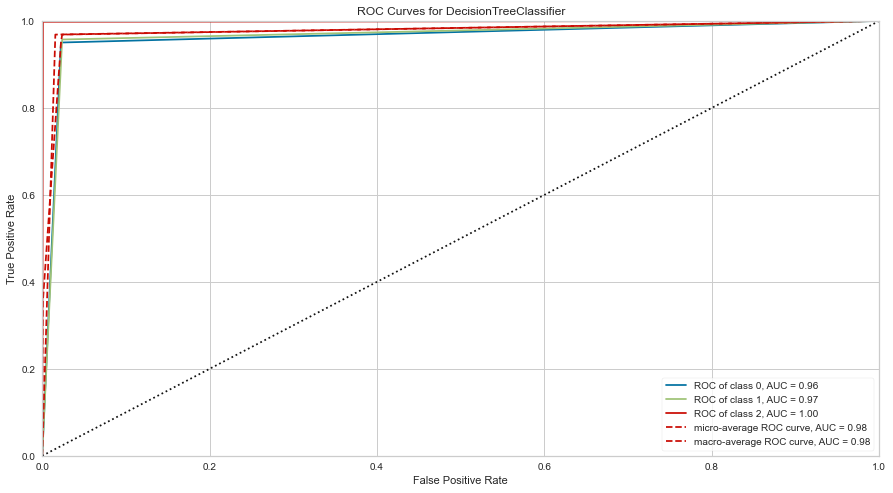

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [64]:
visualizer = ROCAUC(smote_dc, classes=[0,1,2])
visualizer.fit(xtrain, ytrain)
visualizer.score(xtest, ytest)
visualizer.show()  

In [65]:
smote_dc.score(xtest,ytest)

0.9685993046988898

In [66]:
smote_dc.score(xtrain,ytrain)

1.0

In [109]:
m=pd.Series({'Model':'Smote DecisionTree',
             'accuracy_train':round(smote_dc.score(xtrain,ytrain),4),
             'accuracy_test':round(base_dc.score(xtest,ytest),4)
            })
result=result.append(m,ignore_index=True)

# SVM

In [68]:
svc = SVC(kernel='rbf',random_state=10)
smote_svm = svc.fit(xtrain,ytrain)
ypred = smote_svm.predict(xtest)

In [69]:
cm = confusion_matrix(ytest, ypred)
cm

array([[1222,  954,  764],
       [ 724, 1920,  353],
       [ 608,  743, 1629]], dtype=int64)

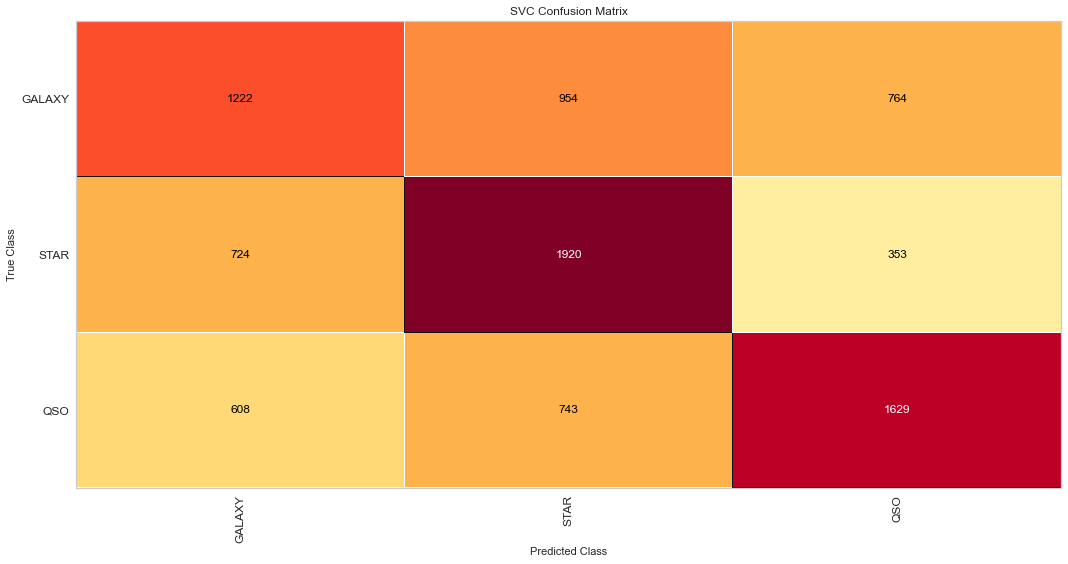

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [70]:
svm_cm = ConfusionMatrix(smote_svm, classes=['GALAXY','STAR','QSO'])

svm_cm.fit(xtrain, ytrain)
svm_cm.score(xtest, ytest)
svm_cm.show()

In [71]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.48      0.42      0.44      2940
           1       0.53      0.64      0.58      2997
           2       0.59      0.55      0.57      2980

    accuracy                           0.54      8917
   macro avg       0.53      0.53      0.53      8917
weighted avg       0.53      0.54      0.53      8917



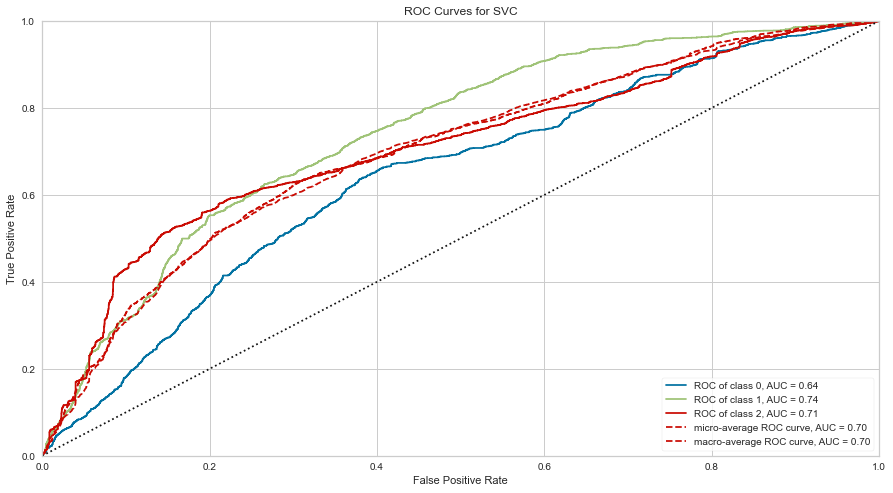

<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [72]:
visualizer = ROCAUC(smote_svm, classes=[0,1,2])
visualizer.fit(xtrain, ytrain)
visualizer.score(xtest, ytest)
visualizer.show()  

In [73]:
smote_svm.score(xtest,ytest)

0.5350454188628463

In [74]:
smote_svm.score(xtrain,ytrain)

0.5272816347731646

In [110]:
m=pd.Series({'Model':'Smote SVM',
             'accuracy_train':round(smote_svm.score(xtrain,ytrain),4),
             'accuracy_test':round(smote_svm.score(xtest,ytest),4)
            })
result=result.append(m,ignore_index=True)

# Randomforest

In [35]:
rf=RandomForestClassifier(random_state=10)
smote_rf=rf.fit(xtrain,ytrain)
ypred=smote_rf.predict(xtest)

In [36]:
cm = confusion_matrix(ytest, ypred)
cm

array([[2859,   57,   24],
       [  89, 2908,    0],
       [   0,    0, 2980]], dtype=int64)

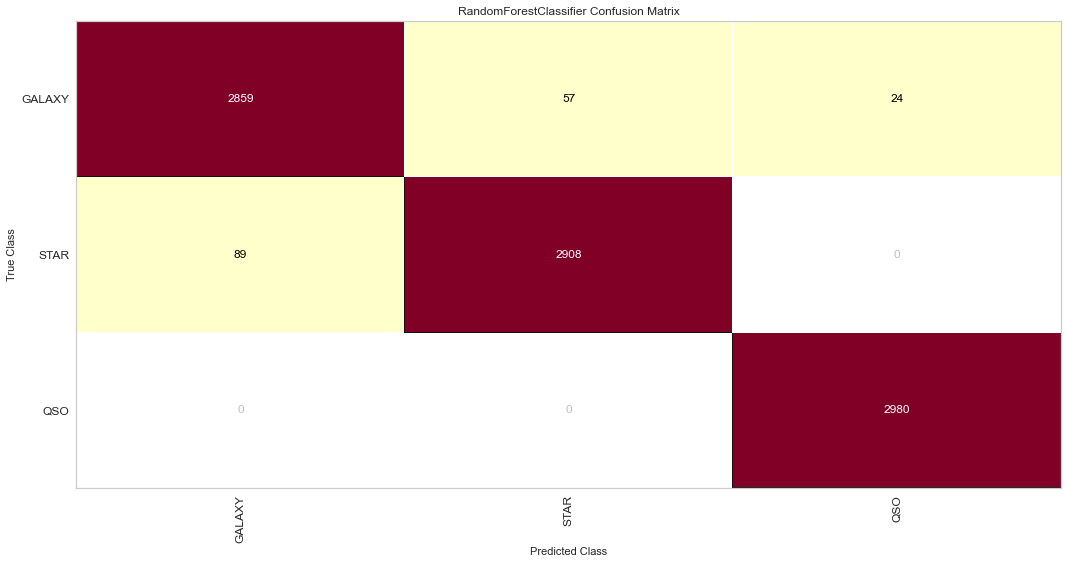

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [78]:
smote_cm = ConfusionMatrix(smote_rf, classes=['GALAXY','STAR','QSO'])

smote_cm.fit(xtrain, ytrain)
smote_cm.score(xtest, ytest)
smote_cm.show()

In [79]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2940
           1       0.98      0.97      0.98      2997
           2       0.99      1.00      1.00      2980

    accuracy                           0.98      8917
   macro avg       0.98      0.98      0.98      8917
weighted avg       0.98      0.98      0.98      8917



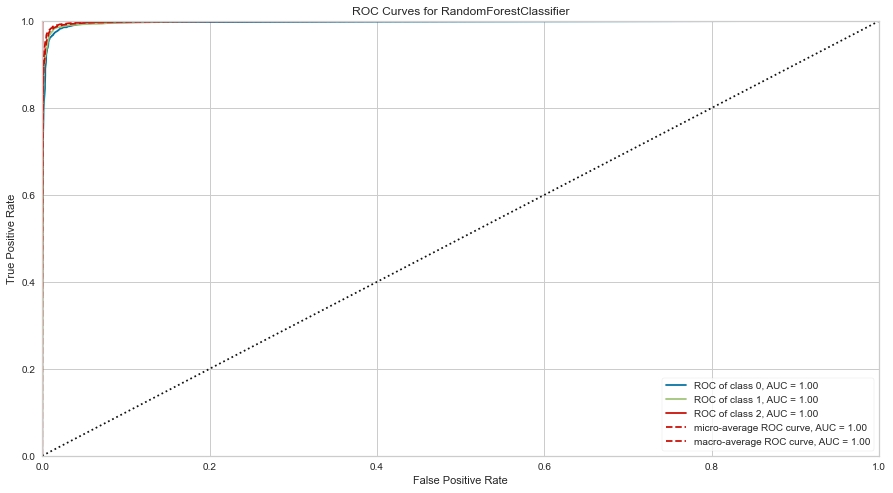

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [80]:
visualizer = ROCAUC(smote_rf, classes=[0,1,2])
visualizer.fit(xtrain, ytrain)
visualizer.score(xtest, ytest)
visualizer.show()  

In [81]:
smote_rf.score(xtest,ytest)

0.9809352921386116

In [82]:
smote_rf.score(xtrain,ytrain)

1.0

In [112]:
m=pd.Series({'Model':'Smote RandomForest',
             'accuracy_train':round(smote_rf.score(xtrain,ytrain),4),
             'accuracy_test':round(smote_rf.score(xtest,ytest),4)
            })
result=result.append(m,ignore_index=True)

In [113]:
result

,Model,accuracy_train,accuracy_test
0,Base SVM,0.5944,0.5912
1,Base DecisionTree,1.0000,0.9608
2,Base RandomForest,1.0000,0.9766
3,Smote DecisionTree,0.9979,0.9608
4,Smote SVM,0.4831,0.4688
5,Smote RandomForest,0.9988,0.9978


In [115]:
result.sort_values('accuracy_test',ascending=False)

,Model,accuracy_train,accuracy_test
5,Smote RandomForest,0.9988,0.9978
2,Base RandomForest,1.0000,0.9766
1,Base DecisionTree,1.0000,0.9608
3,Smote DecisionTree,0.9979,0.9608
0,Base SVM,0.5944,0.5912
4,Smote SVM,0.4831,0.4688


In [55]:
obj_ID=float( input('Enter obj_ID : '))
alpha=float(input('Enter Right Ascension angle (at J2000 epoch) : '))
u=float(input('Enter Ultraviolet filter in the photometric system : '))
g=float(input('Enter Green filter in the photometric system : '))
r=float(input('Enter Red filter in the photometric system : '))
i=float(input('Enter Near Infrared filter in the photometric system : '))
z=float(input('Enter Infrared filter in the photometric system : '))
run_ID=int(input('Enter Run Number used to identify the specific scan : '))
cam_col=int(input('Enter Camera column to identify the scanline within the run : '))
field_ID=float(input('Enter Field number to identify each field : '))
spec_obj_ID=float(input('Enter Unique ID used for optical spectroscopic objects : '))
redshift=float(input('Enter redshift value based on the increase in wavelength : '))
plate=int(input('Enter plate ID, identifies each plate in SDSS : '))
MJD=int(input('Enter Modified Julian Date, used to indicate when a given piece of SDSS data was taken : '))
fiber_ID=int(input('Enter fiber ID that identifies the fiber that pointed the light at the focal plane in each observation : '))

arr=[obj_ID,alpha,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID]
pred=smote_rf.predict([arr])
output= 'Galaxy' if pred==0 else 'Star' if pred==2 else 'Quasar'
print(output)

Enter obj_ID : 1.237665e+18
Enter Right Ascension angle (at J2000 epoch) : 234.4
Enter Ultraviolet filter in the photometric system : 34.424
Enter Green filter in the photometric system : 25
Enter Red filter in the photometric system : 22
Enter Near Infrared filter in the photometric system : 30
Enter Infrared filter in the photometric system : 242
Enter Run Number used to identify the specific scan : 23
Enter Camera column to identify the scanline within the run : 4
Enter Field number to identify each field : 433
Enter Unique ID used for optical spectroscopic objects : 4.461009e+18
Enter redshift value based on the increase in wavelength : 0.566
Enter plate ID, identifies each plate in SDSS : 5000
Enter Modified Julian Date, used to indicate when a given piece of SDSS data was taken : 55000
Enter fiber ID that identifies the fiber that pointed the light at the focal plane in each observation : 33
Galaxy
